### Using features 
#### Client transaction bytes
#### Service transaction bytes

In [4]:
# Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
df=pd.read_csv("./access_logs-all-with-difference.csv")

In [6]:
#display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### select agent

In [7]:
def select_agent(df, agent_id):
    df_selected = df.loc[df['agent_id'] == agent_id]
    return df_selected

### show service ids

In [8]:
def show_unique_service_ids(df, agent_id):
    df_agent_selected = select_agent(df, agent_id)
    service_ids = df_agent_selected.groupby('service_id')['service_id'].first()
    print(service_ids)
 

### select service id

In [9]:
def select_service(df,service_id):
    df_selected = df.loc[df['service_id'] == service_id]
    return df_selected

### select features

In [10]:
def select_features(df, feature_list):
    df_selected = df[feature_list]
    return df_selected

In [11]:
features = ['difference']

### Normalize data

In [12]:
def normalize_data(df):
    
    """ Method for normalizing data using zscore
    
    Args:
        df (dataframe)
        
    Attributes:
        df (dataframe): original dataframe with selected rows and columns
        X (dataframe): consists of copy of df for processing
    
    Returns:
        X(dataframe): Normalized dataframe
        
    """
    
    X = df
    for col in X:
        X[col] = stats.zscore(X[col])
        
    return X

In [13]:
def outlier_detection_dbscan(eps, min_samples, X):
    
    """ Method for detecting multiple clusters, outliers and plotting them.
    
    Args:
        eps (float): The maximum distance between two samples for one to be 
                    considered as in the neighborhood of the other
        min_samples (int):The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
                        This includes the point itself
        X (dataframe): preprocessed datframe
        
    Attributes:
        ss (object): standardscaler object
        X (dataframe): consists of copy of df for processing
        db (object): DBSCAN bject initialized
        y_pred (results): results predicted by DBSCAN object
        cluster_0 (data points): consists of points in cluster 0
        cluster_1 (data points): consists of points in cluster 1
        cluster_2 (data points): consists of points in cluster 2
        cluster_3 (data points): consists of points in cluster 3
        cluster_4 (data points): consists of points in cluster 4
        cluster_5 (data points): consists of points in cluster 5
        outlier (data points): consists of points detected as outliers
    
    Returns: None
        
    """ 
    
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    
    cluster_0 = []
    cluster_1 = []
    cluster_2 = []
    cluster_3 = []
    cluster_4 = []
    cluster_5 = []
    outliers = []
    for i in range(len(X)):
        if db.labels_[i] == -1:
            outliers.append(X[i])
        elif db.labels_[i] == 0:
            cluster_0.append(X[i])
        elif db.labels_[i] == 1:
            cluster_1.append(X[i])
        elif db.labels_[i] == 2:
            cluster_2.append(X[i])
        elif db.labels_[i] == 3:
            cluster_3.append(X[i])
        elif db.labels_[i] == 4:
            cluster_4.append(X[i])
        elif db.labels_[i] == 5:
            cluster_5.append(X[i])
            
    if len(cluster_0) > 0:
        x_0 = []
        y_0 = []
        for i in range(len(cluster_0)):
            x_0.append(cluster_0[i][0])
            y_0.append(cluster_0[i][1])
        plt.scatter(x_0, y_0,c='b', cmap='Paired')
        print("Length of cluster 0 : ", len(cluster_0))

        
    if len(cluster_1) > 0:
        x_1 = []
        y_1 = []
        for i in range(len(cluster_1)):
            x_1.append(cluster_1[i][0])
            y_1.append(cluster_1[i][1])
        plt.scatter(x_1, y_1,c='g', cmap='Paired')
        print("Length of cluster 1 : ", len(cluster_1))

    
    if len(cluster_2) > 0:
        x_2 = []
        y_2 = []
        for i in range(len(cluster_2)):
            x_2.append(cluster_2[i][0])
            y_2.append(cluster_2[i][1])
        plt.scatter(x_2, y_2,c='y', cmap='Paired')
        print("Length of cluster 2 : ", len(cluster_2))

            
    if len(cluster_3) >0:
        x_3 = []
        y_3 = []
        for i in range(len(cluster_3)):
            x_3.append(cluster_3[i][0])
            y_3.append(cluster_3[i][1])
        plt.scatter(x_3, y_3,c='b', marker = "1" ,cmap='Paired')
        print("Length of cluster 3 : ", len(cluster_3))

            
    if len(cluster_4) > 0:
        x_4 = []
        y_4 = []
        for i in range(len(cluster_4)):
            x_4.append(cluster_4[i][0])
            y_4.append(cluster_4[i][1])
        plt.scatter(x_4, y_4,c='b',marker = "2", cmap='Paired')
        print("Length of cluster 4 : ", len(cluster_4))

            
    if len(cluster_5) > 0:
        x_5 = []
        y_5 = []
        for i in range(len(cluster_5)):
            x_5.append(cluster_5[i][0])
            y_5.append(cluster_5[i][1])
        plt.scatter(x_5, y_5,c='b',marker = "3", cmap='Paired')
        print("Length of cluster 5 : ", len(cluster_5))

            
    if len(outliers) > 0:    
        # outliers
        x = []
        y = []
        for i in range(len(outliers)):
            x.append(outliers[i][0])
            y.append(outliers[i][1])
        plt.scatter(x, y,c='r', marker = '*', cmap='Paired') #outlier
        print("Number of outliers : ", len(outliers))


In [14]:
def dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples):
    
    """ Method implementing the whole pipleline of work work dbscan
    
    Args:
        df (dataframe): unprocessed data
        epsilon (float): The maximum distance between two samples for one to be 
                    considered as in the neighborhood of the other
        min_samples (int):The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.
                        This includes the point itself
        features (list): names of features needed
        
    Returns: None
        
    """ 
    
    df = select_agent(df, agent_id)
    df = select_service(df,service_id)
    df = select_features(df, feature_list)
    df = normalize_data(df)
    outlier_detection_dbscan(epsilon, min_samples, df)


    
    
#     df = filter_ip(df)
#     df = select_features(df,features)
#     df = normalize_data(df)
#     outlier_detection_dbscan(epsilon, min_samples, df)
    

In [16]:
df.head()

,id,agent_id,client_physical_ip,client_pseudo_ip,service_id,service_physical_ip,service_pseudo_ip,client_tx_bytes,service_tx_bytes,difference,createdAt,updatedAt,log_start_time,log_end_time
0,26,7067,103.255.5.103,10.0.1.2,701,192.168.3.18,10.0.1.4,19347,52032,32685,27-08-20 11:51,27-08-20 11:51,1598508692,1598509007
1,32,7096,111.119.178.162,10.0.1.194,701,192.168.3.18,10.0.1.196,55508,137447,81939,27-08-20 11:51,27-08-20 11:51,1598509662,1598509776
2,48,7238,39.53.107.112,10.0.0.2,700,192.168.3.1,10.0.0.3,65615,505399,439784,27-08-20 11:51,27-08-20 11:51,1598507738,1598510917
3,74,7352,118.107.131.76,10.0.0.194,701,192.168.3.18,10.0.0.196,14768,77408,62640,27-08-20 11:51,27-08-20 11:51,1598510653,1598511031
4,82,7380,110.38.129.187,10.1.0.66,830,172.16.1.220,10.1.0.72,94493,116133,21640,27-08-20 12:13,27-08-20 12:13,1598508889,1598510156


In [17]:
agent_id = 7238
show_unique_service_ids(df, agent_id)

service_id
700    700
701    701
706    706
725    725
770    770
799    799
800    800
801    801
809    809
818    818
820    820
834    834
838    838
Name: service_id, dtype: int64


Length of cluster 0 :  3
Length of cluster 1 :  2
Length of cluster 2 :  3
Length of cluster 3 :  3
Length of cluster 4 :  6
Length of cluster 5 :  2
Number of outliers :  17


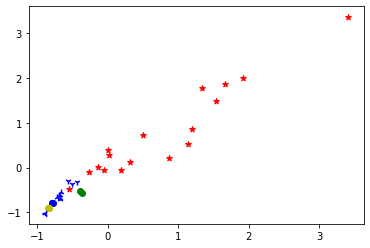

In [18]:
agent_id = 7238
service_id = 700
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.1
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  20
Length of cluster 1 :  3
Length of cluster 2 :  2
Number of outliers :  11


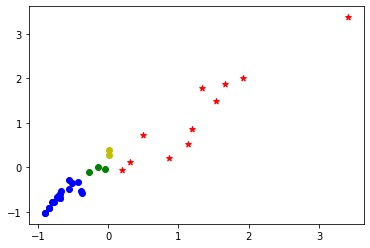

In [20]:
agent_id = 7238
service_id = 700
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.2
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  27
Length of cluster 1 :  4
Length of cluster 2 :  3
Number of outliers :  2


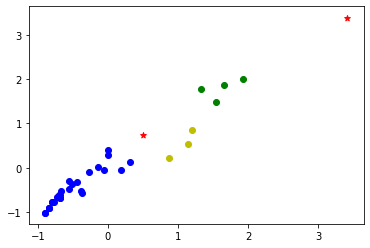

In [21]:
agent_id = 7238
service_id = 700
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.5
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  35
Number of outliers :  1


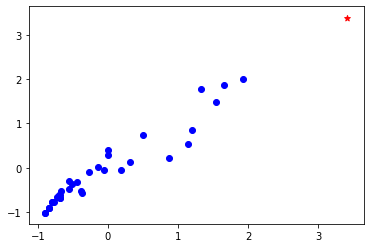

In [22]:
agent_id = 7238
service_id = 700
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.9
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  6
Number of outliers :  30


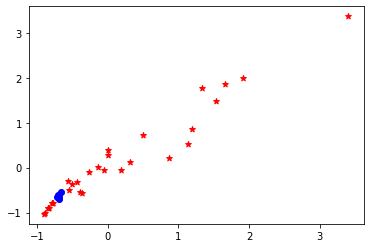

In [23]:
agent_id = 7238
service_id = 700
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.1
min_samples = 4
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  36


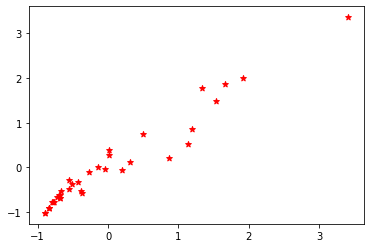

In [24]:
agent_id = 7238
service_id = 700
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.1
min_samples = 8
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  36


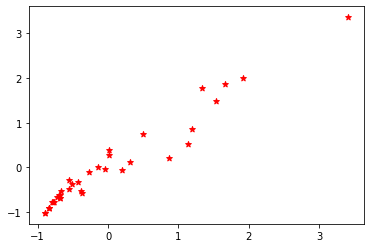

In [25]:
agent_id = 7238
service_id = 700
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.1
min_samples = 10
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  36


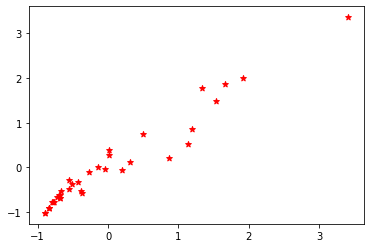

In [26]:
agent_id = 7238
service_id = 700
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.1
min_samples = 20
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  3
Length of cluster 1 :  2
Length of cluster 2 :  2
Length of cluster 3 :  2
Number of outliers :  5


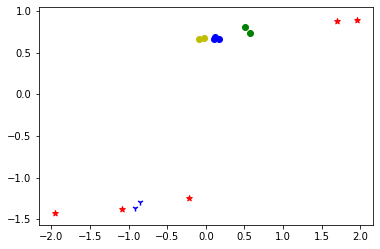

In [27]:
agent_id = 7238
service_id = 701
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.1
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  14


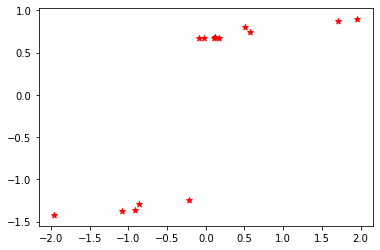

In [28]:
agent_id = 7238
service_id = 701
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.1
min_samples = 6
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  14


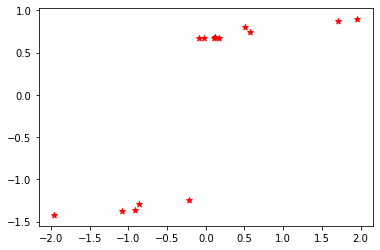

In [29]:
agent_id = 7238
service_id = 701
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.1
min_samples = 9
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  14


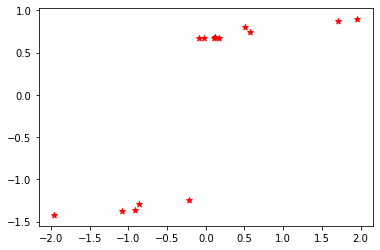

In [30]:
agent_id = 7238
service_id = 701
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.1
min_samples = 12
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  14


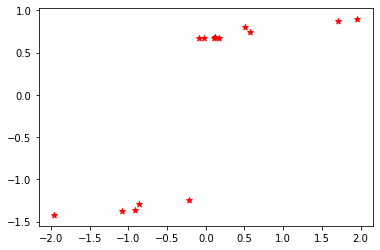

In [31]:
agent_id = 7238
service_id = 701
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.1
min_samples = 20
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  2
Length of cluster 1 :  5
Length of cluster 2 :  3
Length of cluster 3 :  2
Number of outliers :  2


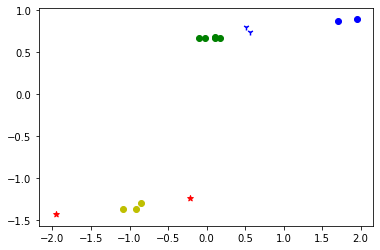

In [32]:
agent_id = 7238
service_id = 701
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.3
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  2
Length of cluster 1 :  7
Length of cluster 2 :  4
Number of outliers :  1


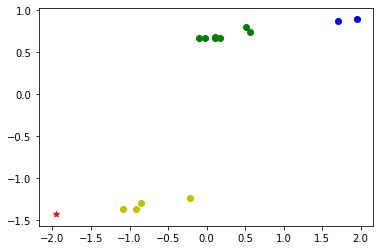

In [33]:
agent_id = 7238
service_id = 701
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.7
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  2
Length of cluster 1 :  7
Length of cluster 2 :  5


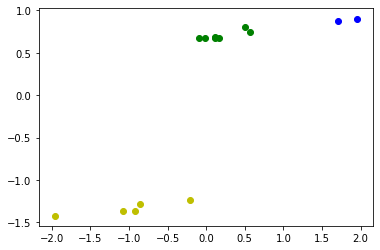

In [34]:
agent_id = 7238
service_id = 701
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.9
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  14


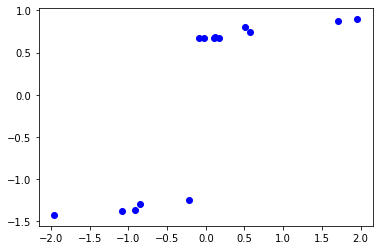

In [35]:
agent_id = 7238
service_id = 701
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 3
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  14


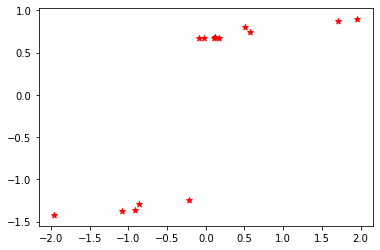

In [36]:
agent_id = 7238
service_id = 701
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.9
min_samples = 15
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  8


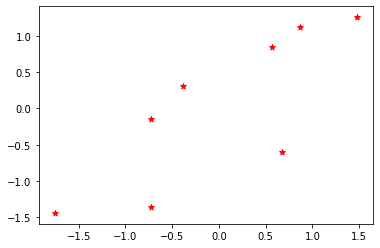

In [37]:
agent_id = 7238
service_id = 838
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.1
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  2
Number of outliers :  6


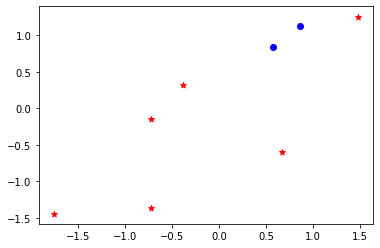

In [38]:
agent_id = 7238
service_id = 838
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.5
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  8


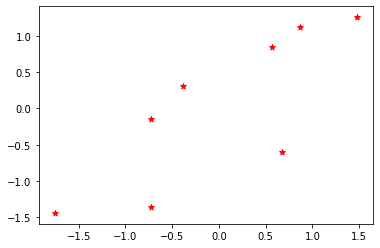

In [39]:
agent_id = 7238
service_id = 838
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.6
min_samples = 10
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  36


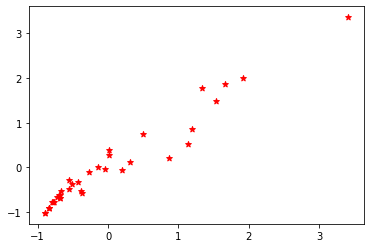

In [40]:

agent_id = 7238
service_id = 700
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.1
min_samples = 10
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  31
Number of outliers :  5


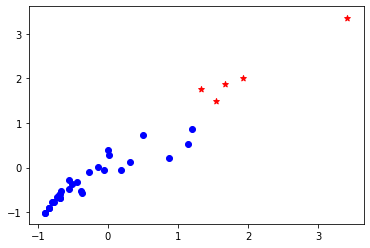

In [41]:

agent_id = 7238
service_id = 700
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 1
min_samples = 10
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  36


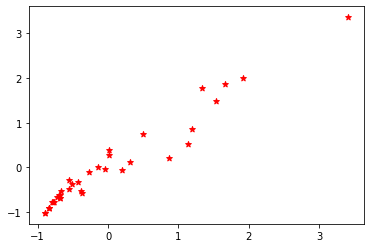

In [42]:

agent_id = 7238
service_id = 700
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.1
min_samples = 20
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  23
Number of outliers :  13


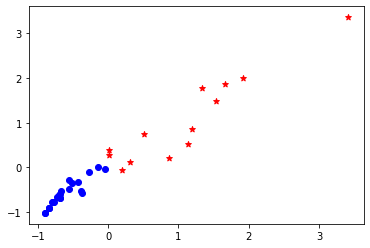

In [43]:

agent_id = 7238
service_id = 700
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.6
min_samples = 20
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  31
Number of outliers :  5


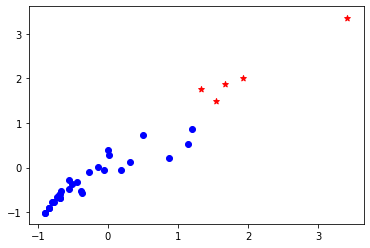

In [44]:

agent_id = 7238
service_id = 700
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 1.6
min_samples = 20
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  8


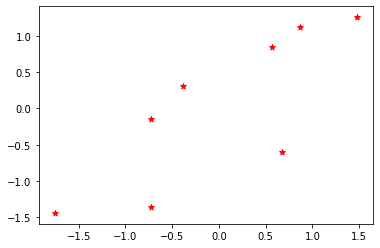

In [45]:

agent_id = 7238
service_id = 838
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.6
min_samples = 10
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  8


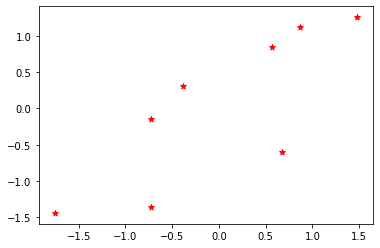

In [47]:

agent_id = 7238
service_id = 838
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.1
min_samples = 10
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  2
Length of cluster 1 :  2
Number of outliers :  4


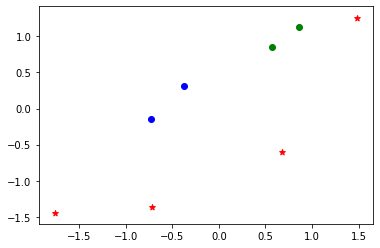

In [48]:

agent_id = 7238
service_id = 838
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.6
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  2
Number of outliers :  6


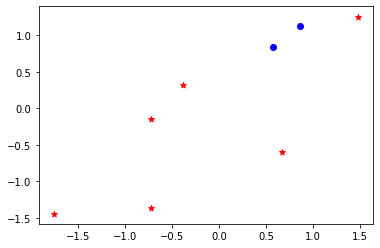

In [49]:

agent_id = 7238
service_id = 838
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.5
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

In [50]:
agent_id = 7380
show_unique_service_ids(df, agent_id)

service_id
735    735
800    800
830    830
Name: service_id, dtype: int64


Length of cluster 0 :  20
Number of outliers :  3


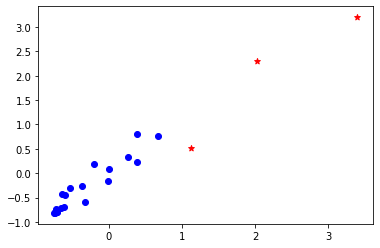

In [51]:
agent_id = 7380
service_id = 735
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.5
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  23


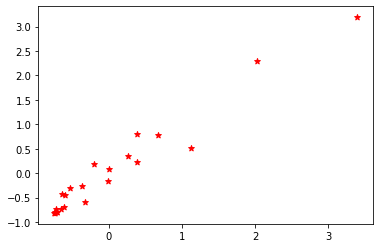

In [52]:
agent_id = 7380
service_id = 735
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.1
min_samples = 10
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  8
Number of outliers :  15


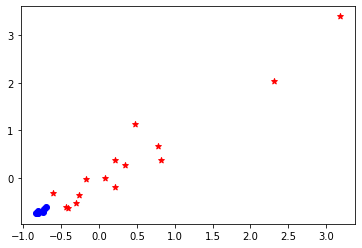

In [53]:
agent_id = 7380
service_id = 735
feature_list = ['difference', 'client_tx_bytes']
epsilon = 0.1
min_samples = 3
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  7
Number of outliers :  16


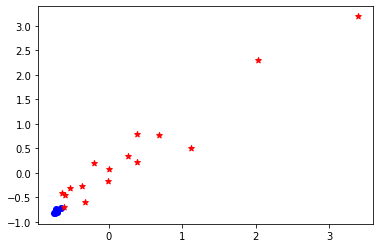

In [54]:
agent_id = 7380
service_id = 735
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.1
min_samples = 6
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  18
Number of outliers :  5


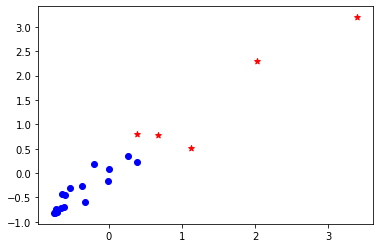

In [55]:
agent_id = 7380
service_id = 735
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.4
min_samples = 3
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  23


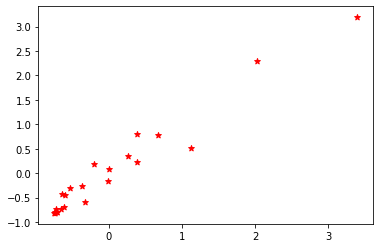

In [56]:
agent_id = 7380
service_id = 735
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.8
min_samples = 20
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  4


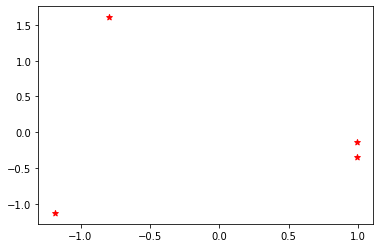

In [57]:
agent_id = 7380
service_id = 800
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.1
min_samples = 10
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  4


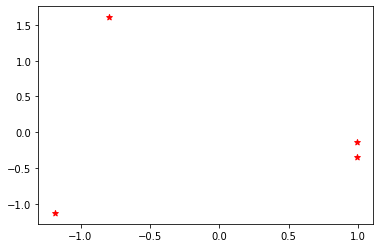

In [58]:
agent_id = 7380
service_id = 800
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.3
min_samples = 10
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  4


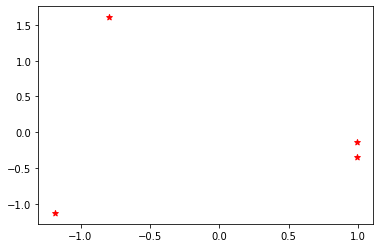

In [59]:
agent_id = 7380
service_id = 800
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.8
min_samples = 10
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  2
Number of outliers :  2


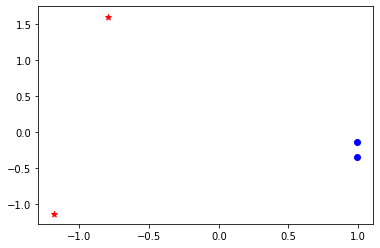

In [60]:
agent_id = 7380
service_id = 800
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.3
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  4


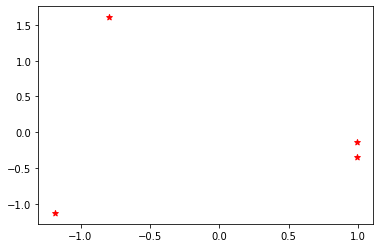

In [61]:
agent_id = 7380
service_id = 800
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.3
min_samples = 6
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  2
Number of outliers :  2


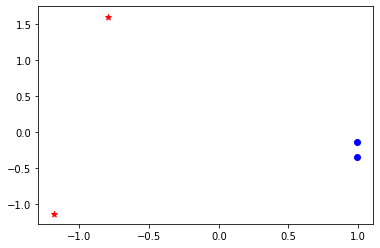

In [62]:
agent_id = 7380
service_id = 800
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.6
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Number of outliers :  4


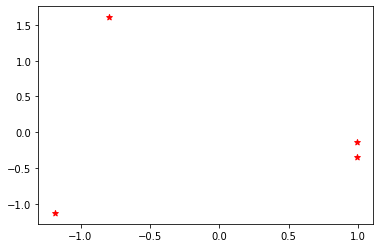

In [63]:
agent_id = 7380
service_id = 800
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.8
min_samples = 9
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  2
Number of outliers :  2


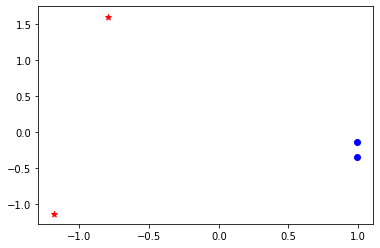

In [64]:
agent_id = 7380
service_id = 800
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.3
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  59
Length of cluster 1 :  4
Length of cluster 2 :  2
Length of cluster 3 :  4
Number of outliers :  6


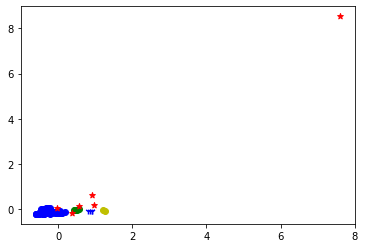

In [65]:
agent_id = 7380
service_id = 830
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.1
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  50
Number of outliers :  25


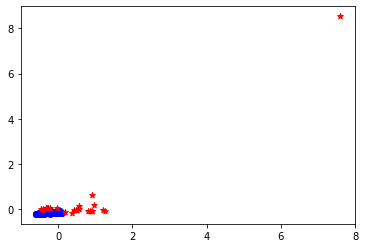

In [66]:
agent_id = 7380
service_id = 830
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.1
min_samples = 7
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  50
Number of outliers :  25


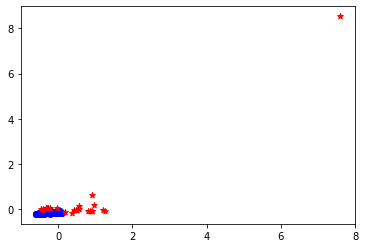

In [67]:
agent_id = 7380
service_id = 830
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.1
min_samples = 9
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  34
Number of outliers :  41


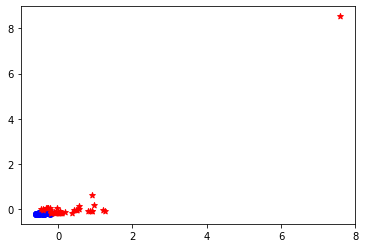

In [69]:
agent_id = 7380
service_id = 830
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.1
min_samples = 13
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  73
Number of outliers :  2


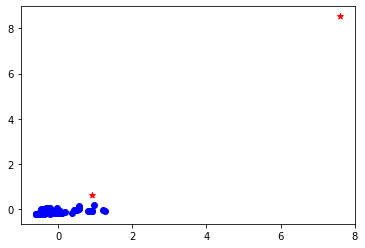

In [70]:
agent_id = 7380
service_id = 830
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.3
min_samples = 2
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  74
Number of outliers :  1


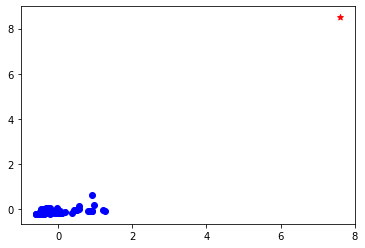

In [71]:
agent_id = 7380
service_id = 830
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.6
min_samples = 7
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)

Length of cluster 0 :  73
Number of outliers :  2


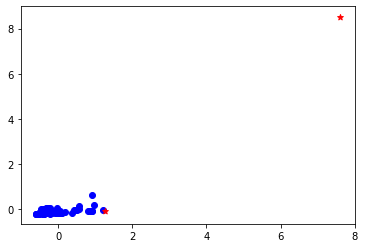

In [72]:
agent_id = 7380
service_id = 830
feature_list = ['client_tx_bytes', "service_tx_bytes"]
epsilon = 0.7
min_samples = 20
dbscan_workflow(df, agent_id, service_id, feature_list, epsilon, min_samples)